In [35]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
from wrangle import wrangle_zillow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1) Load your zillow dataset.

In [5]:
df = wrangle_zillow()
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,4,2.0,3633,296425,2005,6941.39,6037
1,3,4.0,1620,847770,2011,10244.94,6037
2,3,2.0,2077,646760,1926,7924.68,6037
3,0,0.0,1200,5328,1972,91.60,6037
4,0,0.0,171,6920,1973,255.17,6037


In [6]:
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
print(train.shape, validate.shape, test.shape)

(1172966, 7) (502700, 7) (418917, 7)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094583 entries, 0 to 2094582
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    int64  
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  int64  
 3   taxvaluedollarcnt             int64  
 4   yearbuilt                     int64  
 5   taxamount                     float64
 6   fips                          int64  
dtypes: float64(2), int64(5)
memory usage: 127.8 MB


## 2)Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calfulatedfinishedsqft.


In [22]:
x = train['calculatedfinishedsquarefeet']
y =train['taxvaluedollarcnt']

In [17]:
from sklearn.linear_model import LinearRegression

# Now we fit a regression model using OLS method.
# OLS = ordinary least squares.

# create the model object
lm = LinearRegression(normalize=True)

# fit the model to training data
lm.fit(train[['calculatedfinishedsquarefeet']], train.taxvaluedollarcnt)

# make prediction
train['yhat'] = lm.predict(train[['calculatedfinishedsquarefeet']])

train


,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,yhat
410426,3,2.0,1550,357034,1961,4418.72,6037,357264.612498
533217,3,3.5,1800,287774,1996,2798.18,6059,399104.649483
695362,3,2.0,1542,588738,1923,7210.51,6037,355925.731315
729442,3,1.0,1128,290984,1952,3622.02,6037,286638.630067
524897,0,1.0,396,34541,1942,579.61,6037,164131.001774
...,...,...,...,...,...,...,...,...
81672,3,2.5,2460,463327,1966,5183.18,6059,509562.347124
806068,2,1.5,1191,517777,1987,5353.78,6059,297182.319387
703366,3,2.0,1755,478054,1944,5785.01,6037,391573.442826
798811,3,1.0,1188,72975,1947,482.63,6037,296680.238943


In [19]:
train = train.drop(columns =['bedroomcnt','bathroomcnt', 'yearbuilt', 'taxamount', 'fips'])

In [21]:
train['baseline'] = train.taxvaluedollarcnt.mean()
train.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,yhat,baseline
410426,1550,357034,357264.612498,398734.95404
533217,1800,287774,399104.649483,398734.95404
695362,1542,588738,355925.731315,398734.95404
729442,1128,290984,286638.630067,398734.95404
524897,396,34541,164131.001774,398734.95404


## Plot the residuals for the linear regression model that you made.

y = Actual target  
yhat = OLS model prediction

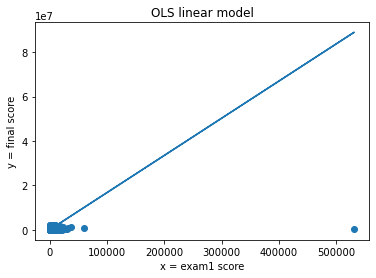

In [26]:
plt.scatter(train.calculatedfinishedsquarefeet, train.taxvaluedollarcnt)
plt.plot(train.calculatedfinishedsquarefeet, train.yhat)
plt.xlabel('x = exam1 score')
plt.ylabel('y = final score')
plt.title('OLS linear model');

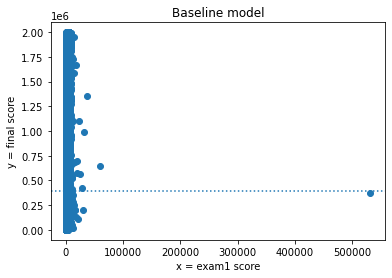

In [27]:
plt.scatter(train.calculatedfinishedsquarefeet, train.taxvaluedollarcnt)
plt.axhline(train.taxvaluedollarcnt.mean(), ls = ':')
plt.xlabel('x = exam1 score')
plt.ylabel('y = final score')
plt.title('Baseline model');

## 4)Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

## 5)Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).



In [29]:
train['residual'] = train.taxvaluedollarcnt - train.yhat
train['baseline_residual'] = train.taxvaluedollarcnt - train.baseline
train

,calculatedfinishedsquarefeet,taxvaluedollarcnt,yhat,baseline,residual,baseline_residual
410426,1550,357034,357264.612498,398734.95404,-230.612498,-41700.95404
533217,1800,287774,399104.649483,398734.95404,-111330.649483,-110960.95404
695362,1542,588738,355925.731315,398734.95404,232812.268685,190003.04596
729442,1128,290984,286638.630067,398734.95404,4345.369933,-107750.95404
524897,396,34541,164131.001774,398734.95404,-129590.001774,-364193.95404
...,...,...,...,...,...,...
81672,2460,463327,509562.347124,398734.95404,-46235.347124,64592.04596
806068,1191,517777,297182.319387,398734.95404,220594.680613,119042.04596
703366,1755,478054,391573.442826,398734.95404,86480.557174,79319.04596
798811,1188,72975,296680.238943,398734.95404,-223705.238943,-325759.95404


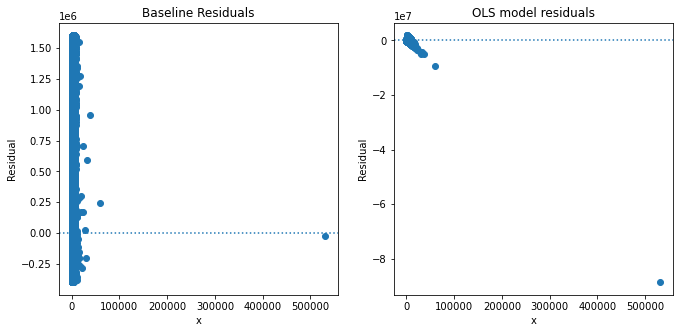

In [31]:
# residual plots (x vs residual)

plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(train.calculatedfinishedsquarefeet, train.baseline_residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(train.calculatedfinishedsquarefeet, train.residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('OLS model residuals');

- sum of squared errors for model and baseline 

In [33]:

SSE2 = MSE2 * len(train)
SSE2_baseline = MSE2_baseline * len(train)

print("SSE", SSE2) 
print("SSE baseline" ,SSE2_baseline) 

SSE 8.697646711380394e+16
SSE baseline 1.1546423369220853e+17


- explained sum of squares

In [43]:
train['residual^2'] = train.residual**2
train['baseline_residual^2'] = train.baseline_residual**2

train.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,yhat,baseline,residual,baseline_residual,residual^2,baseline_residual^2
410426,1550,357034,357264.612498,398734.95404,-230.612498,-41700.95404,5.318212e+04,1.738970e+09
533217,1800,287774,399104.649483,398734.95404,-111330.649483,-110960.95404,1.239451e+10,1.231233e+10
695362,1542,588738,355925.731315,398734.95404,232812.268685,190003.04596,5.420155e+10,3.610116e+10
729442,1128,290984,286638.630067,398734.95404,4345.369933,-107750.95404,1.888224e+07,1.161027e+10
524897,396,34541,164131.001774,398734.95404,-129590.001774,-364193.95404,1.679357e+10,1.326372e+11


In [46]:
SSE = train['residual^2'].sum()
SSE_baseline = train['baseline_residual^2'].sum()

print('SSE =', "{:.1f}".format(SSE))
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))

SSE = 86976467113803936.0
SSE Baseline = 115464233692208544.0


In [47]:
# calculate R2 manually:

# Total Sum of Squares = SSE for baseline
TSS = SSE_baseline = train['baseline_residual^2'].sum()

# Sum of squared error for the regression line (Unexplained error)
SSE = train['residual^2'].sum()

# ESS - Explained sum of squares ('Explained Error')
ESS = TSS - SSE

ESS

2.848776657840461e+16

- total sum of squares model and baseline

In [49]:
# for baseline 
TSS = SSE_baseline = train['baseline_residual^2'].sum()
TSS

1.1546423369220854e+17

In [50]:
TSSM = SSE_model = train['residual^2'].sum()
TSSM

8.697646711380394e+16

- mean squared error for model and badeline 

In [32]:
from sklearn.metrics import mean_squared_error

MSE2 = mean_squared_error(train.taxvaluedollarcnt, train.yhat)
MSE2_baseline = mean_squared_error(train.taxvaluedollarcnt, train.baseline)

print("MSE", MSE2) 
print("MSE baseline" ,MSE2_baseline) 

MSE 74150885118.41258
MSE baseline 98437835105.37265


- root mean squared error

In [51]:
RMSE2 = mean_squared_error(train.taxvaluedollarcnt, train.yhat, squared = False)
RMSE2_baseline = mean_squared_error(train.taxvaluedollarcnt, train.baseline, squared=False)

print("RMSE", RMSE2) 
print("RMSE baseline" ,RMSE2_baseline)  

RMSE 272306.6013125877
RMSE baseline 313748.04398652853


## 6)Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [52]:
if SSE < SSE_baseline:
    print ('Model beats baseline')
else:
    print ('Baseline beats model')

Model beats baseline


## What is the amount of variance explained in your model?

In [53]:
# calculate R2 the easy way:

from sklearn.metrics import r2_score
r2_score(train.taxvaluedollarcnt, train.yhat)

0.2467237313880597

In [54]:
TSS = SSE_baseline = df['baseline_residual^2'].sum()

# Sum of squared error for the regression line (Unexplained error)
SSE = df['residual^2'].sum()

# ESS - Explained sum of squares ('Explained Error')
ESS = TSS - SSE

# Calculate R2
R2 = ESS/TSS
R2

0.24672373138805836

In [55]:
TSS

1.1546423369220843e+17

Is your model better than the baseline model?

- yes it is 

Create a file named evaluate.py that contains the following functions.

plot_residuals(y, yhat): creates a residual plot
regression_errors(y, yhat): returns the following values:
sum of squared errors (SSE)
explained sum of squares (ESS)
total sum of squares (TSS)
mean squared error (MSE)
root mean squared error (RMSE)
baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [ ]:
#Dependencies for these functions
import math
from sklearn.metrics import mean_squared_error

In [ ]:
def plot_residuals(y, yhat):
    residuals = yhat - y
    plt.scatter(x=y, y=residuals)
    plt.title('Residual plot')    

In [ ]:
def regression_errors(y, yhat):
    sse = mean_squared_error(y, yhat) * len(y)
    ess = sum((yhat - y.mean()) ** 2)
    tss = sse + ess
    mse = mean_squared_error(y, yhat)
    rmse = math.sqrt(mse)
    return sse, ess, tss, mse, rmse

In [ ]:
def baseline_mean_errors(y):
    sse = mean_squared_error(y, y.mean()) * len(y)
    mse = mean_squared_error(y, y.mean())
    rmse = math.sqrt(mse)
    return sse, mse, rmse

In [ ]:
def better_than_baseline(y, yhat):
    sse = regression_errors(y, yhat)
    sse_b = baseline_mean_errors(y)
    if sse < sse_b:
        return True
    else:
        return False